In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

In [ ]:
data

(array([[ -9.29768866,   6.47367855],
        [ -9.69874112,   6.93896737],
        [ -1.68665271,   7.79344248],
        [ -7.09730839,  -5.78133274],
        [-10.87645229,   6.3154366 ],
        [ -6.02196757,  -7.04004812],
        [  4.81305976,   2.35848706],
        [ -6.46669574,  -7.44383415],
        [ -2.98837186,   8.82862715],
        [  3.44857534,   2.62972329],
        [ -3.11090424,  10.86656431],
        [  4.99689432,   1.28026009],
        [ -2.30033403,   7.054616  ],
        [ -3.92456837,   8.59364081],
        [ -9.48897033,   6.83639753],
        [ -3.21125072,   8.68662398],
        [-10.46587019,   7.37160786],
        [  2.61473625,   2.159624  ],
        [ -2.41212007,   9.98293112],
        [ -1.92234053,  11.20474175],
        [  5.79847442,   1.15248737],
        [ -2.67048333,   9.41833699],
        [ -5.90450746,  -7.02716697],
        [ -8.95065581,   7.10255332],
        [ -2.97261532,   8.54855637],
        [ -8.30852358,   8.76509154],
        [ -9

In [ ]:
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])
data_scaled

array([[-1.11618972e+00,  5.83771789e-01],
       [-1.19214185e+00,  6.58632948e-01],
       [ 3.25203835e-01,  7.96110991e-01],
       [-6.99477202e-01, -1.38795911e+00],
       [-1.41517920e+00,  5.58311957e-01],
       [-4.95826957e-01, -1.59047610e+00],
       [ 1.55613267e+00, -7.83287999e-02],
       [-5.80050487e-01, -1.65544196e+00],
       [ 7.86816008e-02,  9.62663722e-01],
       [ 1.29772382e+00, -3.46891133e-02],
       [ 5.54761692e-02,  1.29055111e+00],
       [ 1.59094764e+00, -2.51806685e-01],
       [ 2.08983612e-01,  6.77239865e-01],
       [-9.86172076e-02,  9.24856345e-01],
       [-1.15241503e+00,  6.42130301e-01],
       [ 3.64723473e-02,  9.39816576e-01],
       [-1.33742232e+00,  7.28241258e-01],
       [ 1.13980967e+00, -1.10324238e-01],
       [ 1.87813343e-01,  1.14838177e+00],
       [ 2.80568794e-01,  1.34496109e+00],
       [ 1.74275252e+00, -2.72364269e-01],
       [ 1.38883980e-01,  1.05754320e+00],
       [-4.73582122e-01, -1.58840363e+00],
       [-1.

**K-Means**

In [ ]:
import numpy as np

def initialize_centroids(data, k):
    """Randomly initialize the centroids from the data points."""
    indices = np.random.choice(data.shape[0], k, replace=False)
    centeriods=data[indices]
    return centeriods

def compute_distances(data, centroids):
    """Compute the distances between each data point and centroids."""
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return distances

def assign_clusters(distances):
    """Assign each data point to the closest centroid."""
    return np.argmin(distances, axis=0)

def update_centroids(data, clusters, k):
    """Update the centroids by computing the mean of the points in each cluster."""
    new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means(data, k, max_iterations=100):
    """Implement the K-means clustering algorithm."""
    centroids = initialize_centroids(data, k)
    clusters = None
    for _ in range(max_iterations):
        distances = compute_distances(data, centroids)
        newClusters = assign_clusters(distances)
        newCentroids = update_centroids(data, newClusters, k)
        if np.all(centroids == newCentroids) and (clusters is not None and np.all(newClusters == clusters)):
            break
        centroids = newCentroids
        clusters = newClusters
    return clusters, centroids


In [ ]:
# Run the K-means algorithm
clusters, centroids = k_means(data_scaled, k=4)

# Verify the length of clusters
print("Length of clusters:", len(clusters))

# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(4)])
print("Total within-cluster sum of squares: ", wcss)


Length of clusters: 300
Total within-cluster sum of squares:  17.46619760906058


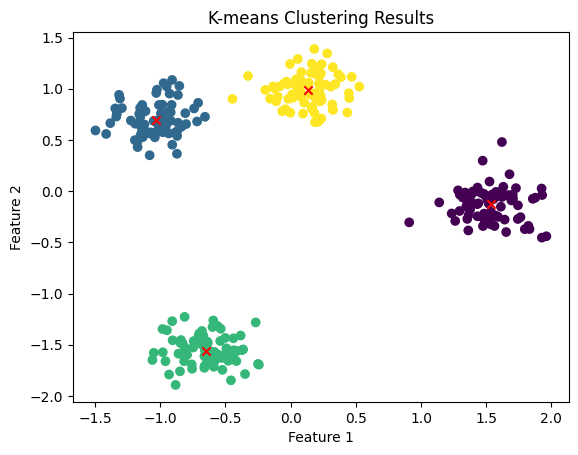

In [ ]:
# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-means Clustering Results")
plt.show()

**k-Mediods**

In [ ]:
import numpy as np

def initialize_medoids(data, k):
    """Randomly initialize the medoids from the data points."""
    medoids = data[np.random.choice(range(len(data)), k, replace=False)]
    return medoids

def compute_dissimilarities(data, medoids):
    """Compute the dissimilarities between each data point and medoids."""
    dissimilarities = np.zeros((len(data), len(medoids)))
    for i, medoid in enumerate(medoids):
        dissimilarities[:, i] = np.linalg.norm(data - medoid, axis=1)
    return dissimilarities

def assign_clusters(dissimilarities):
    """Assign each data point to the closest medoid."""
    cluster = np.argmin(dissimilarities, axis=1)
    return cluster

def update_medoids(data, clusters, k):
    """Update the medoids by selecting the data point with the minimum sum of dissimilarities in each cluster."""
    kmedoids = np.zeros((k, data.shape[1]))
    for i in range(k):
        clusterP = data[clusters == i]
        kmedoids[i] = clusterP[np.argmin(np.sum(compute_dissimilarities(clusterPoints, clusterPoints), axis=1))]
    return kmedoids

def k_medoids(data, k, max_iterations=100):
    """Implement the K-medoids clustering algorithm."""
    kmedoids = initialize_medoids(data, k)
    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, kmedoids)
        clusters = assign_clusters(dissimilarities)
        newMedoids = update_medoids(data, clusters, k)
        if np.array_equal(kmedoids, newMedoids):
            break
        kmedoids = newMedoids
    return clusters, kmedoids

In [ ]:
import numpy as np

# Generate some sample data
data = np.random.rand(100, 2)

# Run the K-Medoids algorithm
clusters, medoids = k_medoids(data, k=4)

# Verify the length of clusters
print("Length of clusters:", len(clusters))

# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data[clusters == i] - medoids[i])) for i in range(4)])
print("Total within-cluster sum of squares: ", wcss)

Length of clusters: 100
Total within-cluster sum of squares:  6.2638303654916


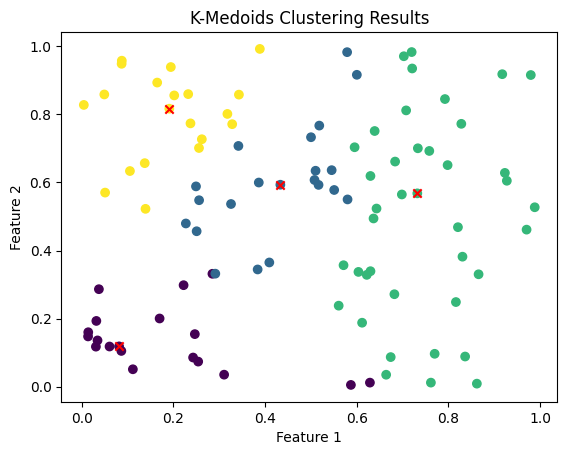

In [ ]:
import matplotlib.pyplot as plt

# Plot the dataset with the assigned clusters and medoids
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Medoids Clustering Results")
plt.show()